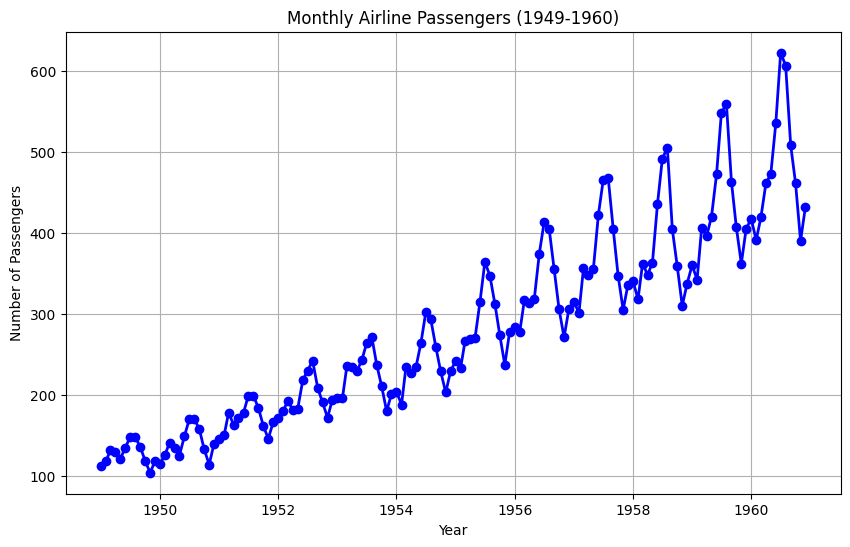

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0)

# Convert 'Month' to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


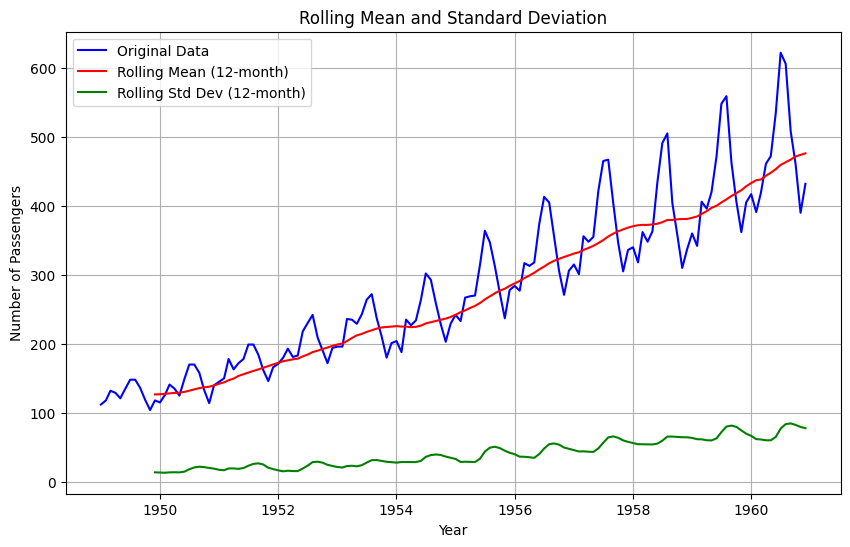

In [2]:
# Calculate rolling statistics
rolling_mean = df['Passengers'].rolling(window=12).mean()  # 12-month rolling mean
rolling_std = df['Passengers'].rolling(window=12).std()  # 12-month rolling std deviation

# Plotting the rolling mean and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], color='blue', label='Original Data')
plt.plot(df.index, rolling_mean, color='red', label='Rolling Mean (12-month)')
plt.plot(df.index, rolling_std, color='green', label='Rolling Std Dev (12-month)')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


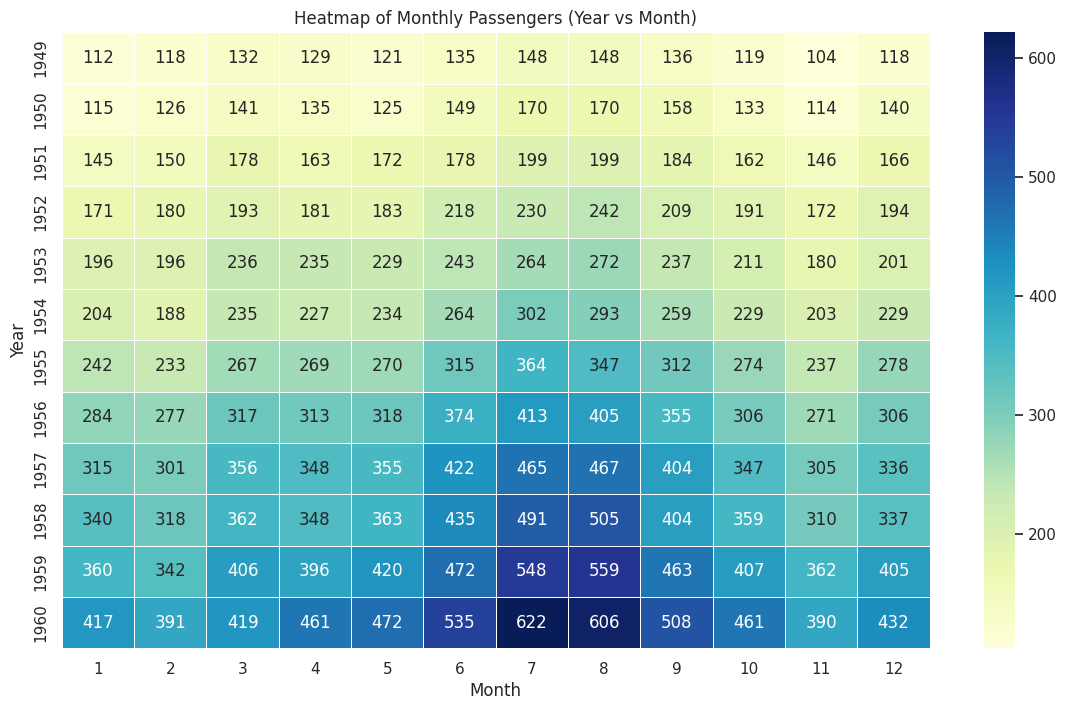

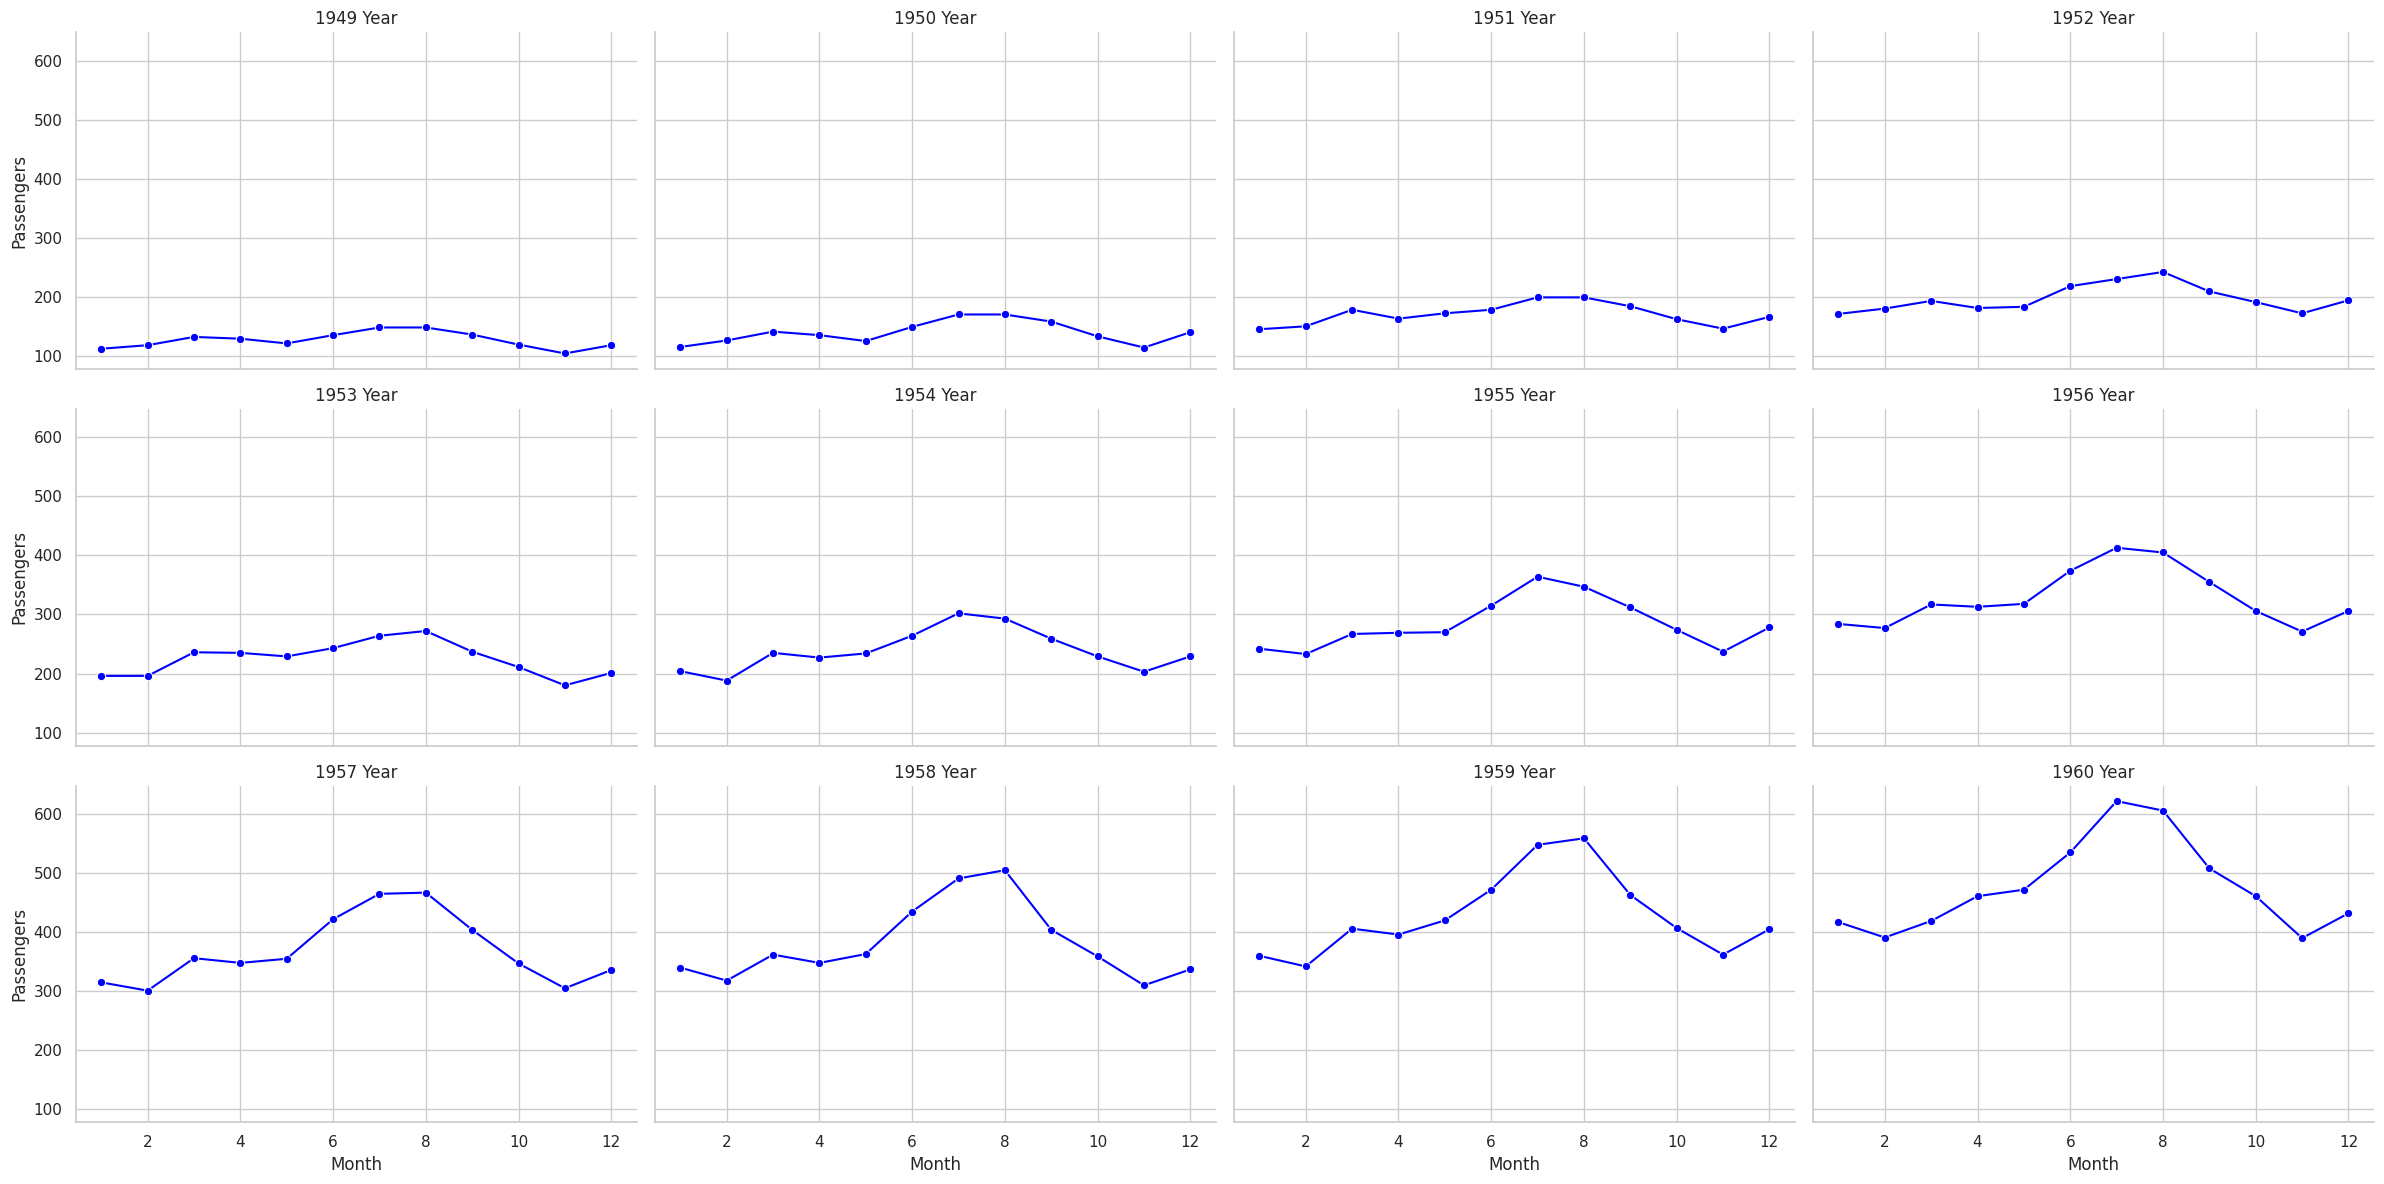

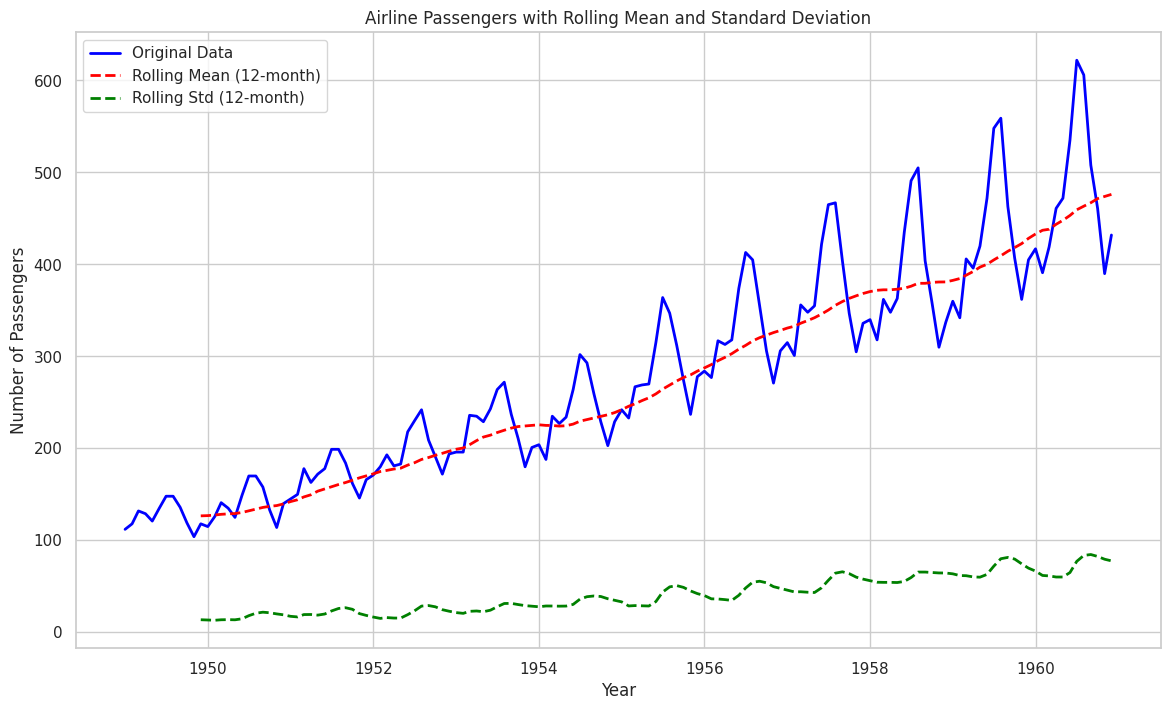

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)
df.sort_index(inplace=True)

df_ffill = df.ffill()

sns.set(style="whitegrid")


monthly_data = df.groupby([df.index.year, df.index.month])['Passengers'].sum().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap of Monthly Passengers (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


df['Year'] = df.index.year
df['Month_Num'] = df.index.month

g = sns.FacetGrid(df, col="Year", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'Month_Num', 'Passengers', marker='o', color='blue')
g.set_titles("{col_name} Year")
g.set_axis_labels("Month", "Passengers")
g.tight_layout()
plt.show()


df['Rolling_Mean'] = df['Passengers'].rolling(window=12).mean()
df['Rolling_Std'] = df['Passengers'].rolling(window=12).std()

plt.figure(figsize=(14, 8))

sns.lineplot(x=df.index, y=df['Passengers'], label="Original Data", color="blue", linewidth=2)
sns.lineplot(x=df.index, y=df['Rolling_Mean'], label="Rolling Mean (12-month)", color="red", linewidth=2, linestyle="--")
sns.lineplot(x=df.index, y=df['Rolling_Std'], label="Rolling Std (12-month)", color="green", linewidth=2, linestyle="--")

plt.title("Airline Passengers with Rolling Mean and Standard Deviation")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()
